In [8]:
import pandas as pd
enrol = pd.read_csv(
    r"C:\Users\Tanaya\Downloads\aadhaar-enrollment-main\aadhaar-enrollment-main\aadhaar-enrollment\data\processed\enrol_cleaned.csv"
)

demo = pd.read_csv(
    r"C:\Users\Tanaya\Downloads\aadhaar-enrollment-main\aadhaar-enrollment-main\aadhaar-enrollment\data\processed\demo_cleaned.csv"
)

# Aggregate pincode-wise enrolment
pincode_enrol = (
    enrol.groupby('pincode')[
        ['age_0_5', 'age_5_17', 'age_18_greater']
    ]
    .sum()
    .reset_index()
)

# Total enrolment per pincode
pincode_enrol['total_enrolment'] = (
    pincode_enrol['age_0_5'] +
    pincode_enrol['age_5_17'] +
    pincode_enrol['age_18_greater']
)

# Normalize gap score (inverse of enrolment)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
pincode_enrol['gap_score'] = 1 - scaler.fit_transform(
    pincode_enrol[['total_enrolment']]
)


In [9]:
geo = pd.read_csv(r"C:\Users\Tanaya\Downloads\aadhaar-enrollment-main\aadhaar-enrollment-main\aadhaar-enrollment\data\processed\pune_pincode_coordinates.csv")

geo_enrol = geo.merge(
    pincode_enrol,
    on='pincode',
    how='left'
)

geo_enrol.to_csv(r"C:\Users\Tanaya\Downloads\aadhaar-enrollment-main\aadhaar-enrollment-main\aadhaar-enrollment\data\processed\pune_pincode_coordinates.csv", index=False)


In [12]:
print(geo_enrol.columns)


Index(['pincode', 'latitude', 'longitude', 'age_0_5_x', 'age_5_17_x',
       'age_18_greater_x', 'total_enrolment_x', 'gap_score_x', 'age_0_5_y',
       'age_5_17_y', 'age_18_greater_y', 'total_enrolment_y', 'gap_score_y'],
      dtype='object')


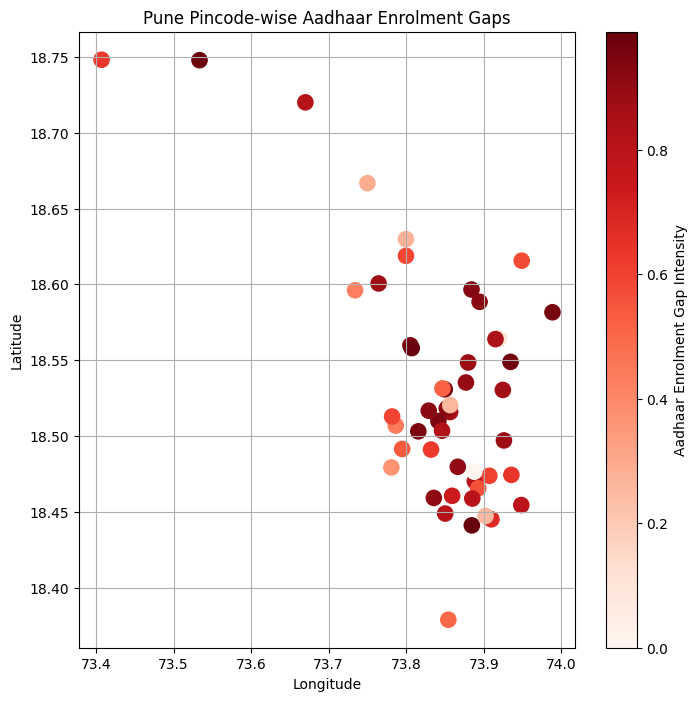

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(
    geo_enrol['longitude'],
    geo_enrol['latitude'],
    c=geo_enrol['gap_score_x'],  # use the correct column
    cmap='Reds',
    s=120
)

plt.colorbar(label='Aadhaar Enrolment Gap Intensity')
plt.title('Pune Pincode-wise Aadhaar Enrolment Gaps')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()
